**PROBLEM STATEMENT**

Develop a machine learning model to predict loan approval (loan_status) based on applicants' demographic, financial, and credit history data. This will assist financial institutions in automating and improving the loan approval process while minimizing risk

**OBJECTIVE OF DATASET**

To build a predictive model that accurately determines loan approval status by analyzing applicant demographics, financial details, loan characteristics, and credit history. This objective aims to assist financial institutions in automating loan processing, improving efficiency, and minimizing the risk of defaults

- **Features**
 - person_age: Age of the applicant.
 - person_gender: Gender of the applicant (e.g., Male, Female).
 - person_education: Education level of the applicant (e.g., High School, Associate, Bachelor, Master, Doctorate).
 - person_income: Annual income of the applicant.
 - person_emp_exp: Years of employment experience of the applicant.
 - person_home_ownership: Type of home ownership (e.g., Own, Rent, Mortgage).
 - loan_amnt: Loan amount requested by the applicant.
 - loan_intent: Purpose of the loan (e.g., Personal, Education, Medical).
 - loan_int_rate: Interest rate of the loan.
 - loan_percent_income: Percentage of income required for the loan.
 - cb_person_cred_hist_length: Length of the applicant's credit history in years.
 - credit_score: Applicant’s credit score.
 - previous_loan_defaults_on_file: Whether the applicant has defaulted on previous loans (Yes/No).

- **Target Variable**
 - loan_status: The target variable indicating loan approval (1 for approved, 0 for denied).

## Understanding the data

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("/content/loan_data (1).csv")
df=pd.DataFrame(data)


In [ ]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [ ]:
df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [ ]:
df.shape

(45000, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [ ]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


## Data Cleaning

In [ ]:
df.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [ ]:
df.duplicated().sum()

# Visualization

array([[<Axes: title={'center': 'person_age'}>,
        <Axes: title={'center': 'person_income'}>,
        <Axes: title={'center': 'person_emp_exp'}>],
       [<Axes: title={'center': 'loan_amnt'}>,
        <Axes: title={'center': 'loan_int_rate'}>,
        <Axes: title={'center': 'loan_percent_income'}>],
       [<Axes: title={'center': 'cb_person_cred_hist_length'}>,
        <Axes: title={'center': 'credit_score'}>,
        <Axes: title={'center': 'loan_status'}>]], dtype=object)

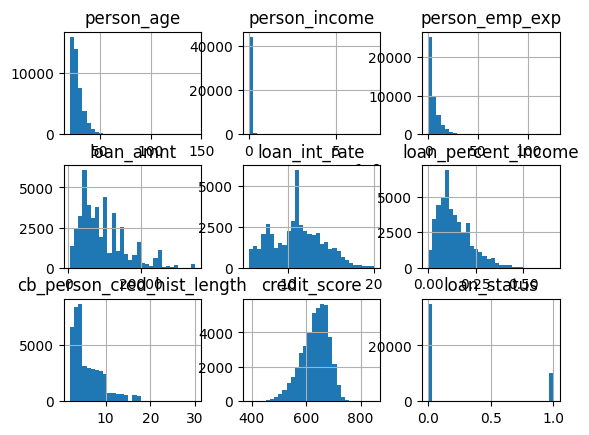

In [ ]:
df.hist(bins=30)

<Axes: xlabel='loan_int_rate', ylabel='Count'>

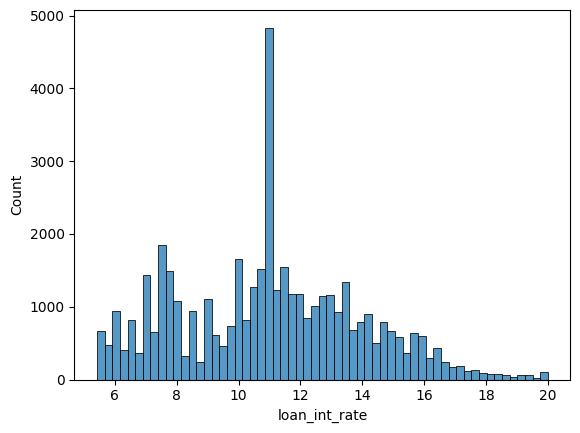

In [ ]:
sns.histplot(df["loan_int_rate"])

<Axes: xlabel='person_education', ylabel='person_income'>

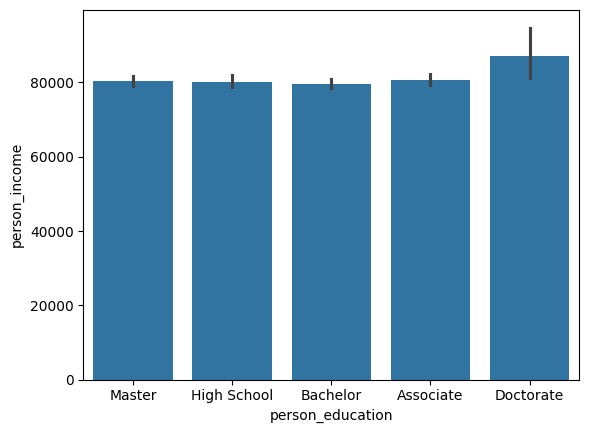

In [ ]:
sns.barplot(x=df["person_education"],y=df["person_income"])

<Axes: xlabel='person_income', ylabel='person_age'>

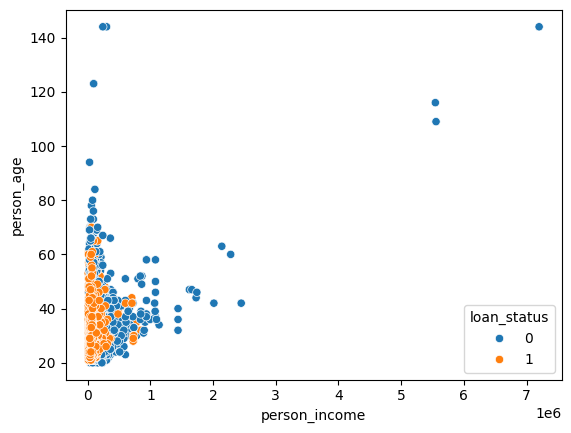

In [ ]:
sns.scatterplot(x=df["person_income"],y=df["person_age"],hue=df["loan_status"])

# 5. Correlation analysis

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df['person_gender'] = labelencoder.fit_transform(df['person_gender'])
df['person_home_ownership'] = labelencoder.fit_transform(df['person_home_ownership'])
df['loan_intent'] = labelencoder.fit_transform(df['loan_intent'])
df['previous_loan_defaults_on_file'] = labelencoder.fit_transform(df['previous_loan_defaults_on_file'])


# Replacing because its ordinal data
df["person_education"].replace(['High School', 'Associate', 'Bachelor', 'Master', 'Doctorate'],[0,1,2,3,4],inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  int64  
 2   person_education                45000 non-null  int64  
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  int64  
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  int64  
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

<ipython-input-21-7ac9c7b4aab1>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["person_education"].replace(['High School', 'Associate', 'Bachelor', 'Master', 'Doctorate'],[0,1,2,3,4],inplace=True)
<ipython-input-21-7ac9c7b4aab1>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["person_educ

In [ ]:
df["loan_status"].value_counts()

,count
loan_status,
0,35000
1,10000


### Imbalanced data to Oversampling

In [ ]:
# After finding its imbalanced so oversampoing method is used

from imblearn.over_sampling import SMOTE

# Split into features and target
X = df.drop('loan_status', axis=1)
y = df['loan_status']


smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

df=pd.concat([X_resampled,y_resampled],axis=1)

In [ ]:
df["loan_status"].value_counts()

,count
loan_status,
1,35000
0,35000


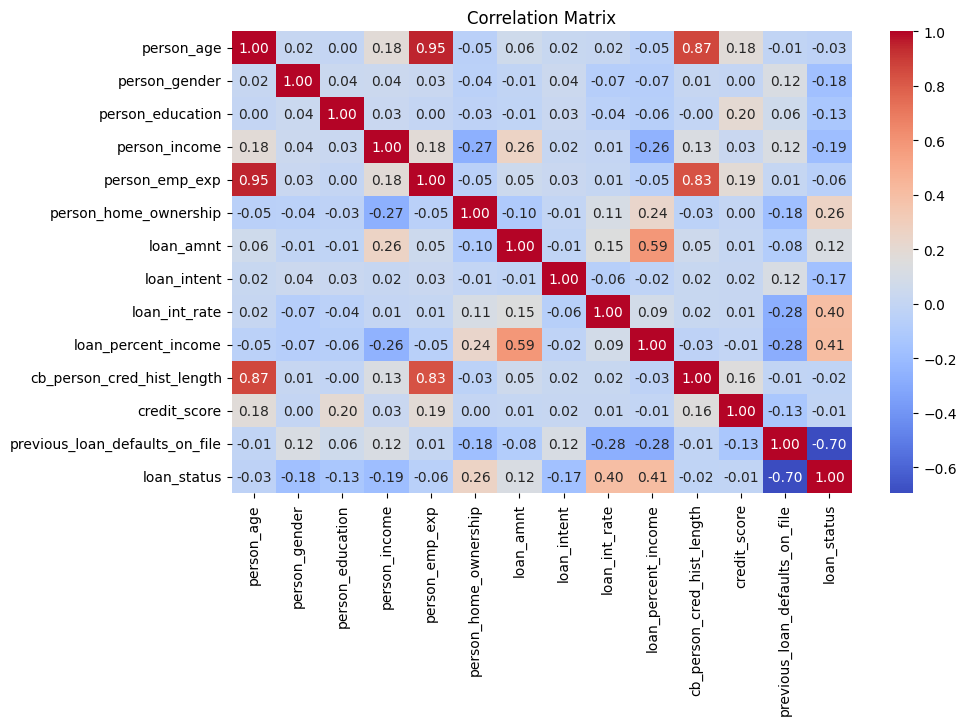

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True, fmt='0.02f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

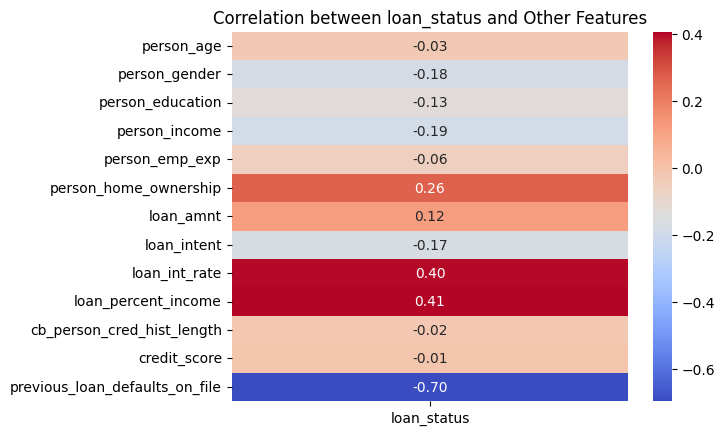

In [ ]:
price_corr = df.corr()['loan_status']

# Remove the correlation of 'loan_status' with itself (which is always 1)
price_corr = price_corr.drop('loan_status')

# Create a heatmap to visualize the correlations
sns.heatmap(price_corr.to_frame(), annot=True, fmt='.2f', cmap='coolwarm',
            cbar=True, annot_kws={'size': 10})  # to_frame() converts Series to DataFrame for heatmap
plt.title('Correlation between loan_status and Other Features')
plt.show()

In [ ]:
df.drop('person_gender',axis=1,inplace=True)
df.drop('person_education',axis=1,inplace=True)
df.drop('credit_score',axis=1,inplace=True)
df.drop('cb_person_cred_hist_length',axis=1,inplace=True)
df.drop('person_emp_exp',axis=1,inplace=True)
df.drop('person_age',axis=1,inplace=True)
df.drop('loan_intent',axis=1,inplace=True)

## Skewness and log

<Figure size 3000x800 with 0 Axes>

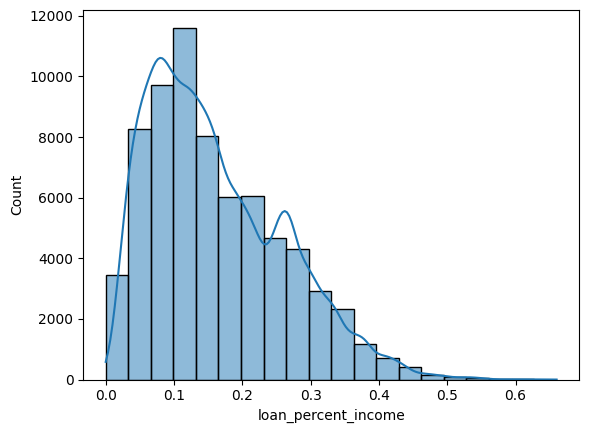

<Figure size 3000x800 with 0 Axes>

In [ ]:
sns.histplot(df['loan_percent_income'],bins=20, kde=True)
plt.figure(figsize=(30,8))

In [ ]:
df['loan_percent_income'] = np.log1p(df['loan_percent_income'])

<Figure size 3000x800 with 0 Axes>

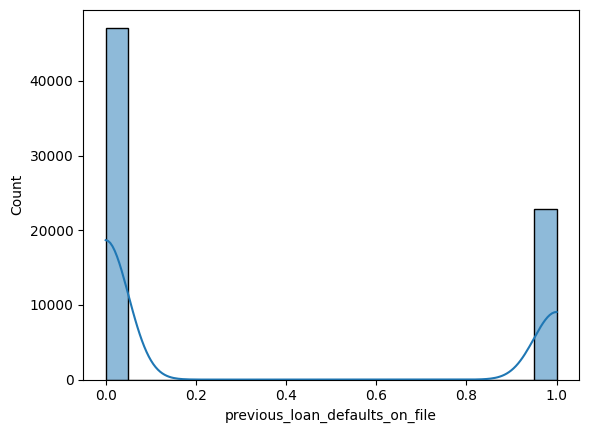

<Figure size 3000x800 with 0 Axes>

In [ ]:
sns.histplot(df['previous_loan_defaults_on_file'],bins=20, kde=True)
plt.figure(figsize=(30,8))

In [ ]:
df['previous_loan_defaults_on_file'] = np.log1p(df['previous_loan_defaults_on_file'])

<Figure size 3000x800 with 0 Axes>

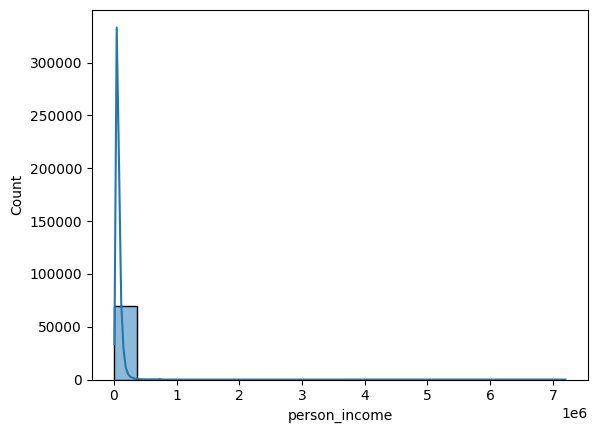

<Figure size 3000x800 with 0 Axes>

In [ ]:
sns.histplot(df['person_income'],bins=20, kde=True)
plt.figure(figsize=(30,8))

In [ ]:
df['person_income'] = np.log1p(df['person_income'])

<Figure size 3000x800 with 0 Axes>

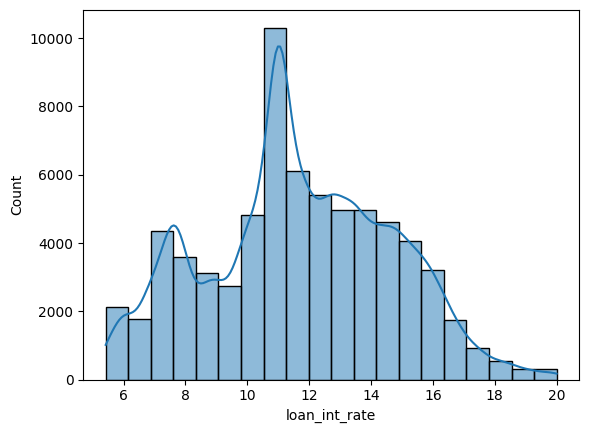

<Figure size 3000x800 with 0 Axes>

In [ ]:
sns.histplot(df['loan_int_rate'],bins=20, kde=True)
plt.figure(figsize=(30,8))

In [ ]:
df['loan_int_rate'] = np.log1p(df['loan_int_rate'])

<Figure size 3000x800 with 0 Axes>

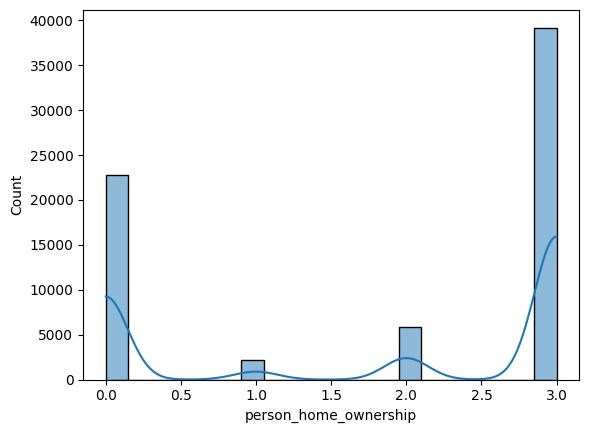

<Figure size 3000x800 with 0 Axes>

In [ ]:
sns.histplot(df['person_home_ownership'],bins=20, kde=True)
plt.figure(figsize=(30,8))

In [ ]:
df['person_home_ownership'] = np.log1p(df['person_home_ownership'])

<Figure size 3000x800 with 0 Axes>

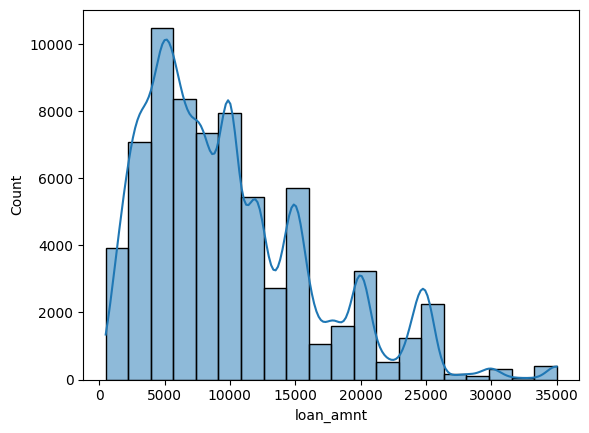

<Figure size 3000x800 with 0 Axes>

In [ ]:
sns.histplot(df['loan_amnt'],bins=20, kde=True)
plt.figure(figsize=(30,8))

In [ ]:
df['loan_amnt'] = np.log1p(df['loan_amnt'])

# 6.Removing outliers

<Axes: >

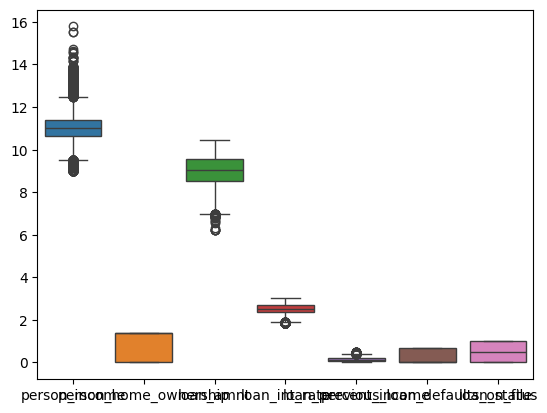

In [ ]:
sns.boxplot(df)

In [ ]:
def remove_outliers_iqr(df, exclude_column):
    for col in df.columns:

        if col == exclude_column:
            continue
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df


df_cleaned = remove_outliers_iqr(df, exclude_column='loan_status')
df_cleaned


,person_income,person_home_ownership,loan_amnt,loan_int_rate,loan_percent_income,previous_loan_defaults_on_file,loan_status
3,11.286702,1.386294,10.463132,2.786861,0.364643,0.0,1
6,11.445417,1.386294,10.463132,2.596746,0.314811,0.0,1
7,11.467415,1.386294,10.463132,2.494032,0.314811,0.0,1
8,11.519752,1.386294,10.463132,2.292535,0.300105,0.0,1
10,11.542348,1.386294,10.463132,2.430978,0.292670,0.0,1
...,...,...,...,...,...,...,...
69994,10.725084,1.386294,9.544789,2.504512,0.270027,0.0,1
69996,10.704920,0.000000,8.294300,2.754401,0.086178,0.0,1
69997,11.376326,0.000000,10.126671,2.963622,0.254642,0.0,1
69998,10.897174,1.386294,7.484287,2.446107,0.029559,0.0,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


x=df[['loan_percent_income','loan_int_rate','person_home_ownership','loan_amnt']]
y=df['loan_status']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define a dictionary of models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} accuracy: {accuracy:.2f}')

Logistic Regression accuracy: 0.77
Decision Tree accuracy: 0.84
Random Forest accuracy: 0.87
SVM accuracy: 0.77
KNN accuracy: 0.82


# 7,Diamonsionality reduction(pca)

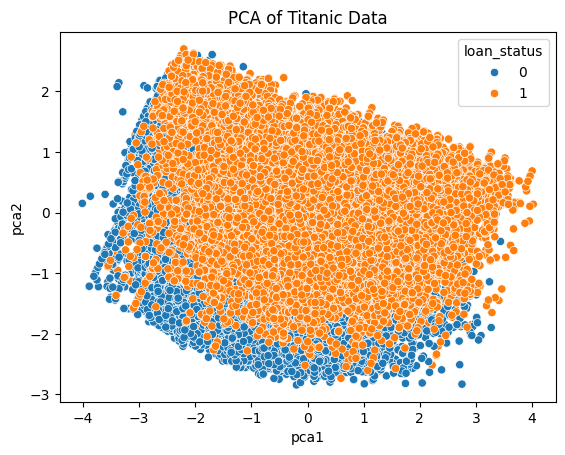

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features=['loan_percent_income','loan_int_rate','person_home_ownership','loan_amnt']
x= StandardScaler().fit_transform(df[features])


pca= PCA(n_components=2)
pca_result= pca.fit_transform(x)

df["pca1"]= pca_result[:,0]
df["pca2"]= pca_result[:,1]

sns.scatterplot(x="pca1", y="pca2", hue="loan_status",data=df)
plt.title("PCA of Titanic Data")
plt.show()

In [ ]:
x = df[['pca1',"pca2"]]
y = df['loan_status']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# Define a dictionary of models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} accuracy: {accuracy:.2f}')

Logistic Regression accuracy: 0.71
Decision Tree accuracy: 0.72
Random Forest accuracy: 0.76
SVM accuracy: 0.74
KNN accuracy: 0.74


# 8.Data scaling


In [ ]:
from sklearn.preprocessing import MinMaxScaler

features=['loan_percent_income','loan_int_rate','person_home_ownership','loan_amnt']
scaler= MinMaxScaler()

# Fit the scaler to  data and transform it
scaled_data = scaler.fit_transform(df[features])

scaled_df = pd.DataFrame(scaled_data, columns=features, index=df.index)
scaled_df["loan_status"]=df['loan_status']

In [ ]:
x=scaled_df[['loan_percent_income','loan_int_rate','person_home_ownership','loan_amnt']]
y=scaled_df['loan_status']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# Define a dictionary of models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} accuracy: {accuracy:.2f}')
    print()
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 30)

Logistic Regression accuracy: 0.77


Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.76      0.77      7023
           1       0.76      0.78      0.77      6977

    accuracy                           0.77     14000
   macro avg       0.77      0.77      0.77     14000
weighted avg       0.77      0.77      0.77     14000

------------------------------
Decision Tree accuracy: 0.84


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      7023
           1       0.85      0.83      0.84      6977

    accuracy                           0.84     14000
   macro avg       0.84      0.84      0.84     14000
weighted avg       0.84      0.84      0.84     14000

------------------------------
Random Forest accuracy: 0.87


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      7023
       

# Docummentation and reporting

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test, y_pred)
print("RandomForestClassifier: ",accuracy)
print()
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("-" * 30)

RandomForestClassifier:  0.872


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      7023
           1       0.89      0.85      0.87      6977

    accuracy                           0.87     14000
   macro avg       0.87      0.87      0.87     14000
weighted avg       0.87      0.87      0.87     14000

------------------------------
